<a href="https://colab.research.google.com/github/phreakyphoenix/ExplainableCV/blob/master/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import matplotlib.pyplot as plt

W0702 14:38:26.940964 139725779040128 deprecation.py:323] From /usr/local/lib/python2.7/dist-packages/tensorflow_core/python/compat/v2_compat.py:88: disable_resource_variables (from tensorflow.python.ops.variable_scope) is deprecated and will be removed in a future version.
Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
def generate_dataset():
 x_batch = np.linspace(0, 2, 100)
 y_batch = 1.5 * x_batch + np.random.randn(*x_batch.shape) * 0.2 + 0.5
 print x_batch.shape
 return x_batch, y_batch

In [ ]:
x_batch, y_batch = generate_dataset()
print x_batch
print y_batch

(100,)
[0.         0.02020202 0.04040404 0.06060606 0.08080808 0.1010101
 0.12121212 0.14141414 0.16161616 0.18181818 0.2020202  0.22222222
 0.24242424 0.26262626 0.28282828 0.3030303  0.32323232 0.34343434
 0.36363636 0.38383838 0.4040404  0.42424242 0.44444444 0.46464646
 0.48484848 0.50505051 0.52525253 0.54545455 0.56565657 0.58585859
 0.60606061 0.62626263 0.64646465 0.66666667 0.68686869 0.70707071
 0.72727273 0.74747475 0.76767677 0.78787879 0.80808081 0.82828283
 0.84848485 0.86868687 0.88888889 0.90909091 0.92929293 0.94949495
 0.96969697 0.98989899 1.01010101 1.03030303 1.05050505 1.07070707
 1.09090909 1.11111111 1.13131313 1.15151515 1.17171717 1.19191919
 1.21212121 1.23232323 1.25252525 1.27272727 1.29292929 1.31313131
 1.33333333 1.35353535 1.37373737 1.39393939 1.41414141 1.43434343
 1.45454545 1.47474747 1.49494949 1.51515152 1.53535354 1.55555556
 1.57575758 1.5959596  1.61616162 1.63636364 1.65656566 1.67676768
 1.6969697  1.71717172 1.73737374 1.75757576 1.77777778 

(0, 2)

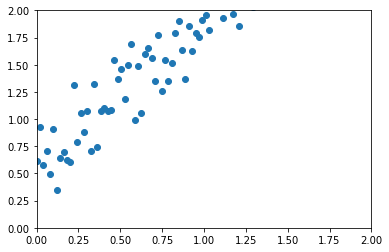

In [ ]:
plt.scatter(x_batch, y_batch)
plt.xlim(0, 2)
plt.ylim(0, 2)

In [ ]:
def linear_regression():
  x = tf.placeholder(tf.float32, shape=(None, ), name='x')
  y = tf.placeholder(tf.float32, shape=(None, ), name='y')

  with tf.variable_scope('lreg') as scope:
    w = tf.Variable(np.random.normal(), name='W')
    b = tf.Variable(np.random.normal(), name='b')
		
    y_pred = tf.add(tf.multiply(w, x), b)    # w*x + b

    loss = tf.reduce_mean(tf.square(y_pred - y))

  return x, y, y_pred, loss

(100,)
(0, 'loss:', 0.36260486)
(1, 'loss:', 0.22245085)
(2, 'loss:', 0.173363)
(3, 'loss:', 0.15343764)
(4, 'loss:', 0.14302713)
(5, 'loss:', 0.13588467)
(6, 'loss:', 0.13001406)
(7, 'loss:', 0.12476776)
(8, 'loss:', 0.11992694)
(9, 'loss:', 0.11540948)
(10, 'loss:', 0.11117737)
(11, 'loss:', 0.10720737)
(12, 'loss:', 0.1034816)
(13, 'loss:', 0.099984504)
(14, 'loss:', 0.09670187)
(15, 'loss:', 0.09362047)
(16, 'loss:', 0.09072801)
(17, 'loss:', 0.08801287)
(18, 'loss:', 0.08546417)
(19, 'loss:', 0.083071716)
(20, 'loss:', 0.08082593)
(21, 'loss:', 0.078717805)
(22, 'loss:', 0.07673892)
(23, 'loss:', 0.07488134)
(24, 'loss:', 0.07313763)
(25, 'loss:', 0.07150083)
(26, 'loss:', 0.069964364)
(27, 'loss:', 0.06852209)
(28, 'loss:', 0.067168236)
(29, 'loss:', 0.06589737)
(30, 'loss:', 0.06470442)
(31, 'loss:', 0.063584596)
(32, 'loss:', 0.06253342)
(33, 'loss:', 0.061546683)
(34, 'loss:', 0.06062044)
(35, 'loss:', 0.05975097)
(36, 'loss:', 0.058934804)
(37, 'loss:', 0.058168683)
(38, 'los

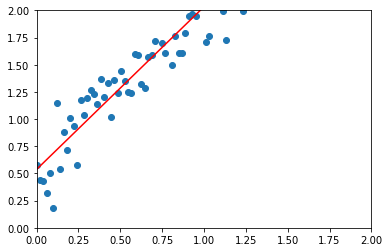

In [ ]:
def run():
  x_batch, y_batch = generate_dataset()
  x, y, y_pred, loss = linear_regression()

  optimizer = tf.train.GradientDescentOptimizer(0.1)
  train_op = optimizer.minimize(loss)

  with tf.Session() as session:
    session.run(tf.global_variables_initializer())
    feed_dict = {x: x_batch, y: y_batch}
		
    for i in range(200):
      session.run(train_op, feed_dict)
      print(i, "loss:", loss.eval(feed_dict))

    print('Predicting')
    y_pred_batch = session.run(y_pred, {x : x_batch})

  plt.scatter(x_batch, y_batch)
  plt.plot(x_batch, y_pred_batch, color='red')
  plt.xlim(0, 2)
  plt.ylim(0, 2)
  plt.savefig('plot.png')

if __name__ == "__main__":
  run()